In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 8)

import seaborn as sns

from astropy.io import fits

In [4]:
tb = fits.open("../data/LOFAR_HBA_T1_DR1_catalog_v1.0.srl.fits")

In [6]:
dat = fits.open("../data/P205+55-mosaic.fits")[0]
dat

In [7]:
(~np.isnan(dat.data)).sum(), (np.isnan(dat.data)).sum()

(62659355, 17121269)

In [8]:
tb.info()

Filename: ../data/LOFAR_HBA_T1_DR1_catalog_v1.0.srl.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     91   325694R x 29C   [24A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 1A, 11A, J]   


In [9]:
dat.data.shape

(8932, 8932)

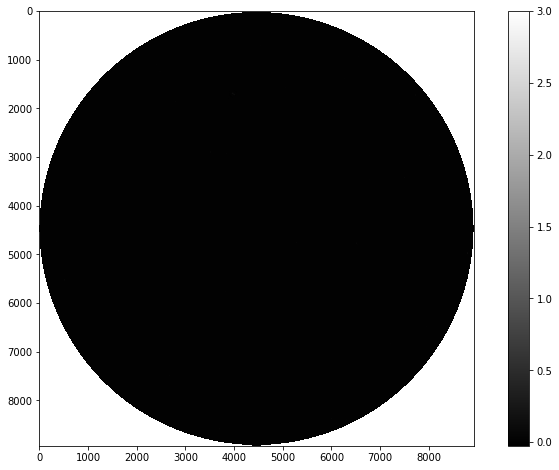

In [10]:
plt.imshow(dat.data, cmap="gray")
plt.colorbar();

In [11]:
d = np.nan_to_num(dat.data, 0.0)

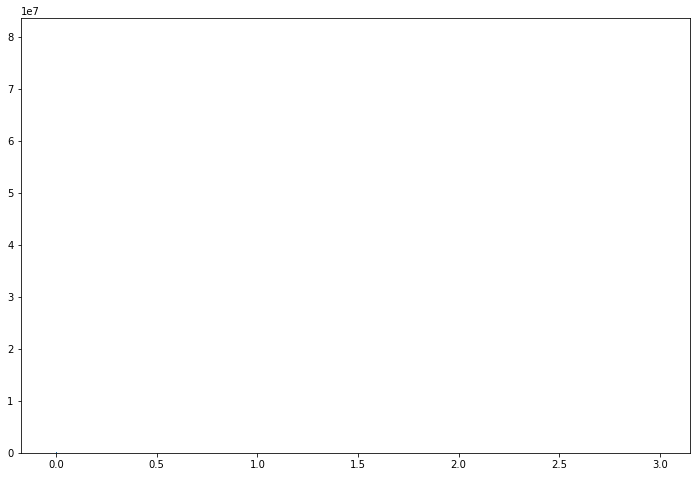

In [12]:
NBINS = 1000
plt.hist(dat.data.flatten(), NBINS);

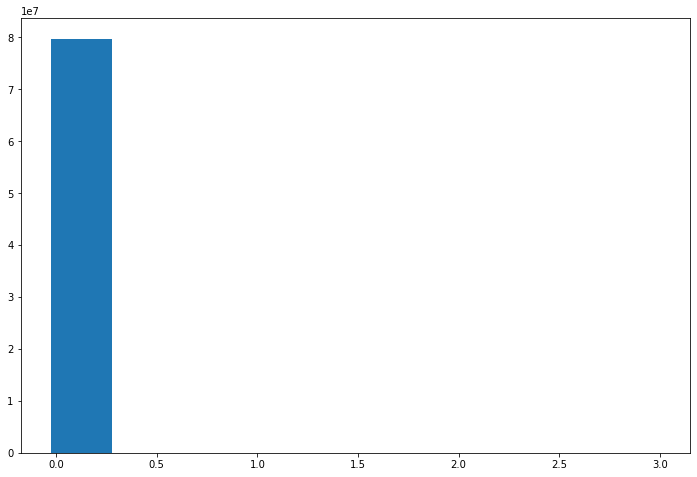

In [13]:
plt.hist(d.flatten());

In [14]:
def calc_pixel_indices_above_n_sigma(n, data):
    sd = data.flatten().std()
    points_of_interest = (np.abs(data) > n * sd)
    return np.where(points_of_interest)

In [15]:
def plot_interesting_area(i, size, indices_of_interest, cmap="gray"):
    margin = size // 2
    index = indices_of_interest[0][i], indices_of_interest[1][i]
    
    vl, vu = np.max([0, index[0] - margin]), np.min([d.shape[0] - 1, index[0] + margin])
    hl, hu = np.max([0, index[1] - margin]), np.min([d.shape[1] - 1, index[1] + margin])
    
    dsub = d[vl:vu, hl:hu]
    plt.imshow(dsub, cmap=cmap)
    plt.colorbar();    

In [16]:
ioi = calc_pixel_indices_above_n_sigma(5, d)

In [17]:
d[20:30, 20:30]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

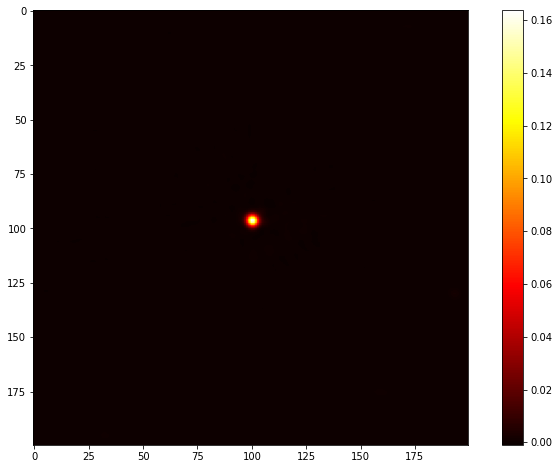

In [32]:
plot_interesting_area(700, 200, ioi, "hot")

In [19]:
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

In [20]:
ob = tb[1].data[0]

In [21]:
tb[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  240 / length of dimension 1                          
NAXIS2  =               325694 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   29 / number of table fields                         
TTYPE1  = 'Source_Name'                                                         
TFORM1  = '24A     '                                                            
TTYPE2  = 'RA      '                                                            
TFORM2  = 'D       '                                                            
TUNIT2  = 'deg     '        

In [22]:
h = tb[0]

In [23]:
print(h.header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [24]:
ob

('ILTJ122108.44+491340.9', 185.28516877080278, 0.08507008411738805, 0.1500160490083484, 49.22803976784459, 0.09402500843402939, 0.15526943665562457, 1.4871877664600872, 0.05254471658028932, 0.3020431183603504, 1.4516772350894518, 0.09187271628868793, 0.30452465876073154, 6.196006627074602, 0.22896105350895785, 5.673333506824536, 0.19165276631465974, 0.0, 0.22896105350895785, 0.0, 0.19165276631465974, 153.93537616228963, 18.490888645800393, 0.0, 18.490888645800393, 0.052946499636163935, 'S', 'P22Hetdex04', 188)

In [25]:
print(repr(dat.header))

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 8932                                                  
NAXIS2  =                 8932                                                  
WCSAXES =                    2                                                  
CTYPE1  = 'RA---SIN'                                                            
CTYPE2  = 'DEC--SIN'                                                            
CUNIT1  = 'deg     '                                                            
CUNIT2  = 'deg     '                                                            
CRPIX1  =                 4466                                                  
CRPIX2  =                 4466                                                  
CRVAL1  =        205.0552666